In [ ]:
## Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## 1. Carregamento e Análise Exploratória dos Dados

# Carregando os dados
print("Carregando o dataset de Weather Type Detection...")
df = pd.read_csv('weather_classification_data.csv')
print("Dataset carregado com sucesso!")

Carregando o dataset de Weather Type Detection...
Dataset carregado com sucesso!


In [ ]:
# Exibindo as primeiras linhas do dataset
print("\nPrimeiras linhas do dataset:")
print(df.head())


Primeiras linhas do dataset:
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4      

In [ ]:
# Informações sobre o dataset
print("\nInformações do dataset:")
print(df.info())


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB
None


In [ ]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.00

In [ ]:
# Verificando valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64



Distribuição da variável alvo (Weather Type):


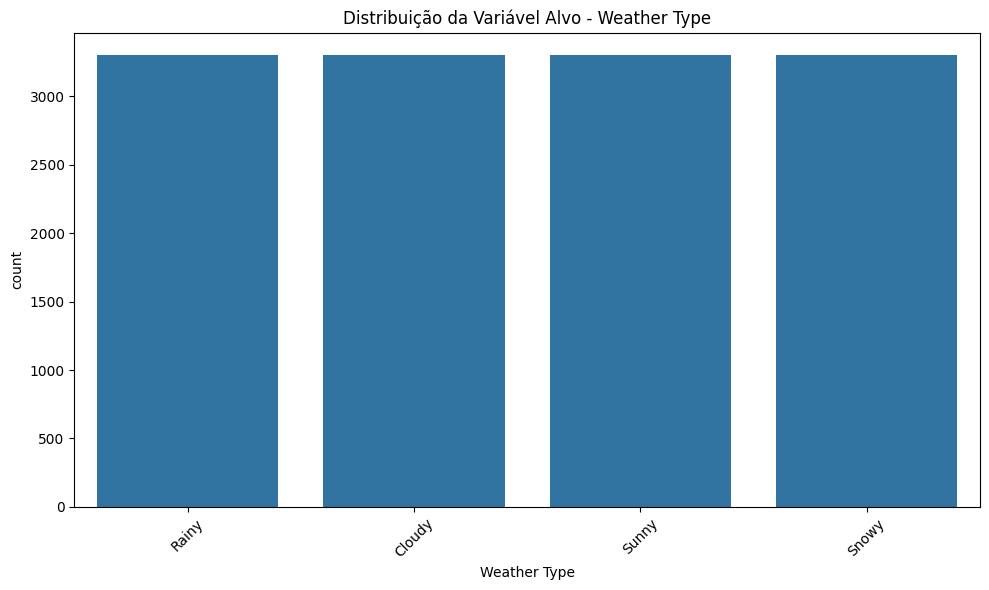

In [ ]:
# Análise da distribuição da variável alvo
print("\nDistribuição da variável alvo (Weather Type):")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather Type')
plt.title('Distribuição da Variável Alvo - Weather Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

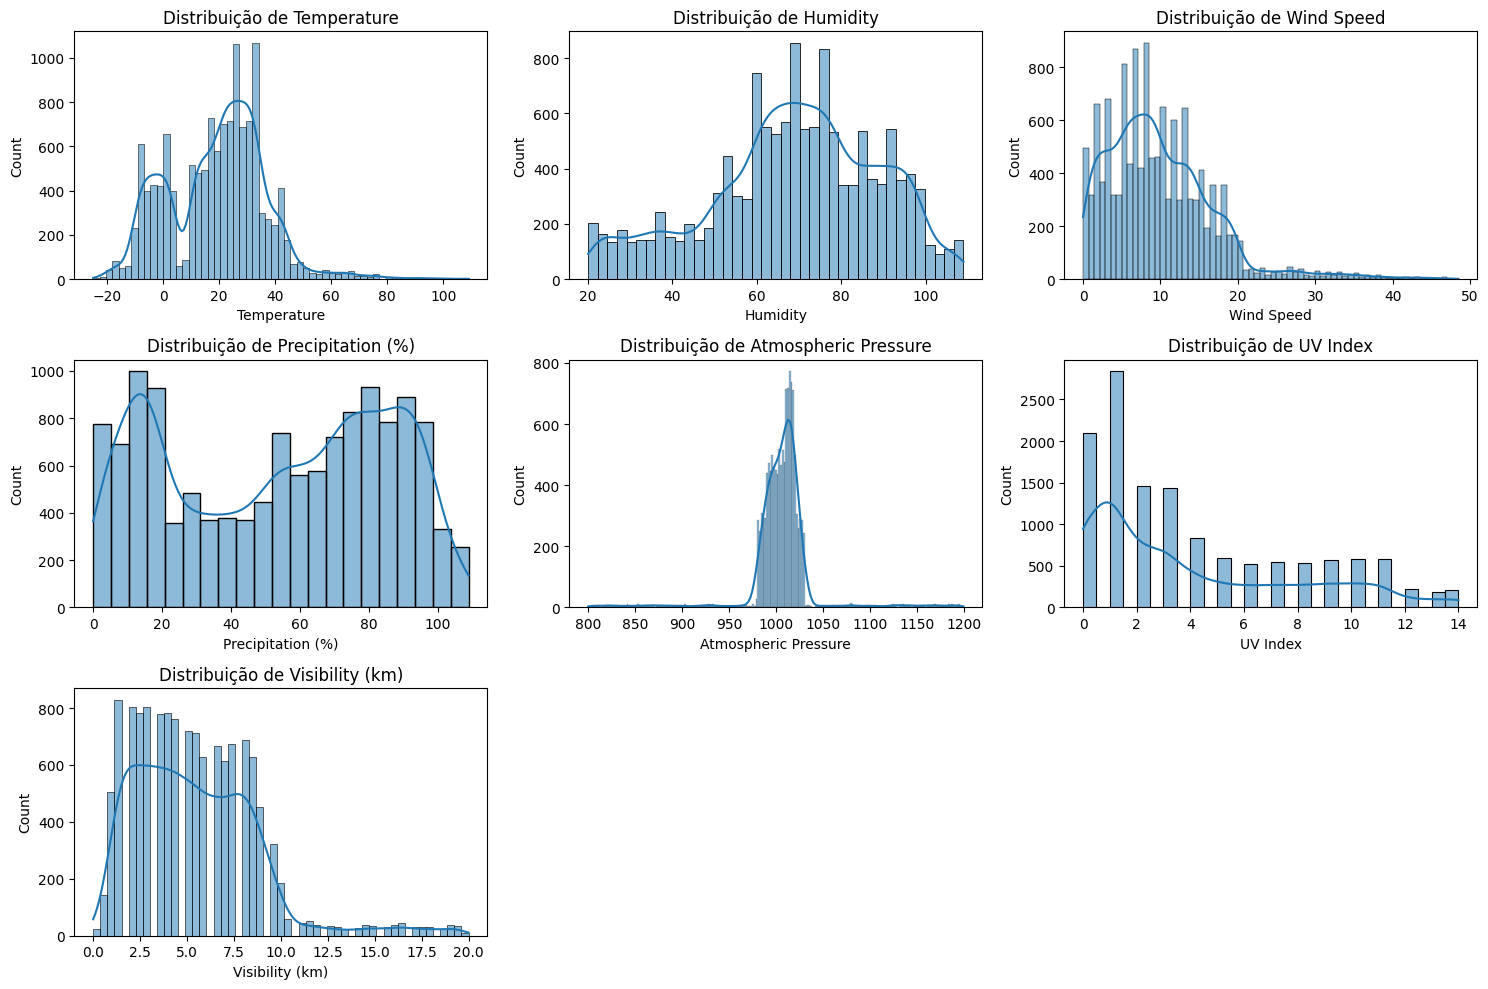

In [ ]:
## 2. Análise Exploratória de Dados (EDA)
# Análise da distribuição das features numéricas
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribuição de {feature}')
plt.tight_layout()
plt.show()

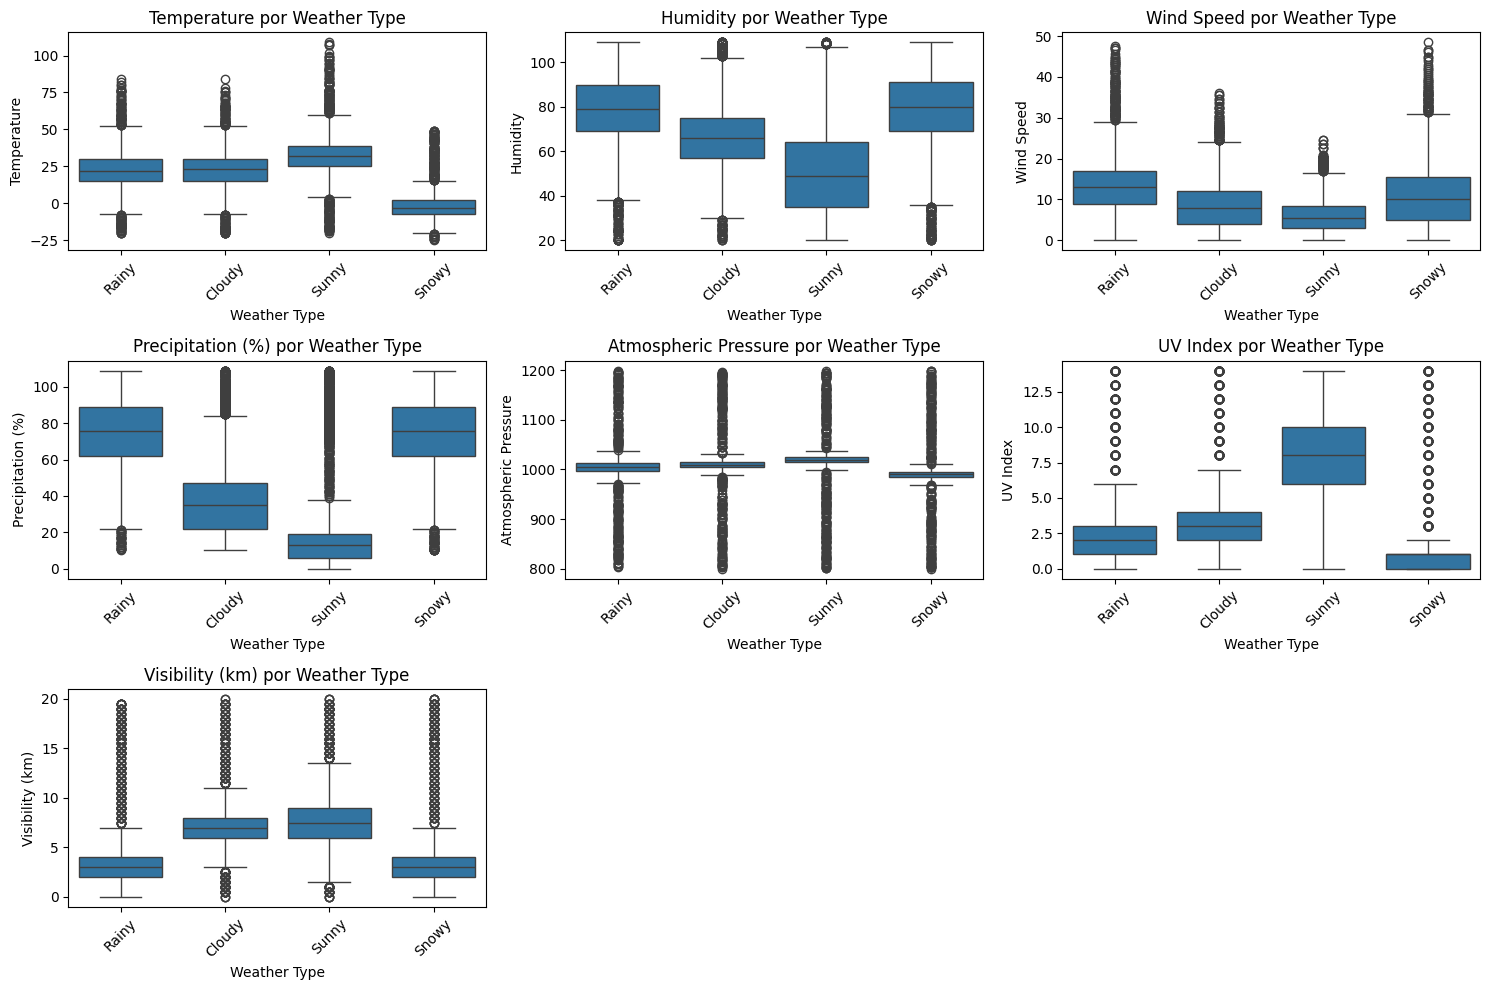

In [ ]:
# Relação entre as features numéricas e a variável alvo
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Weather Type', y=feature, data=df)
    plt.title(f'{feature} por Weather Type')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

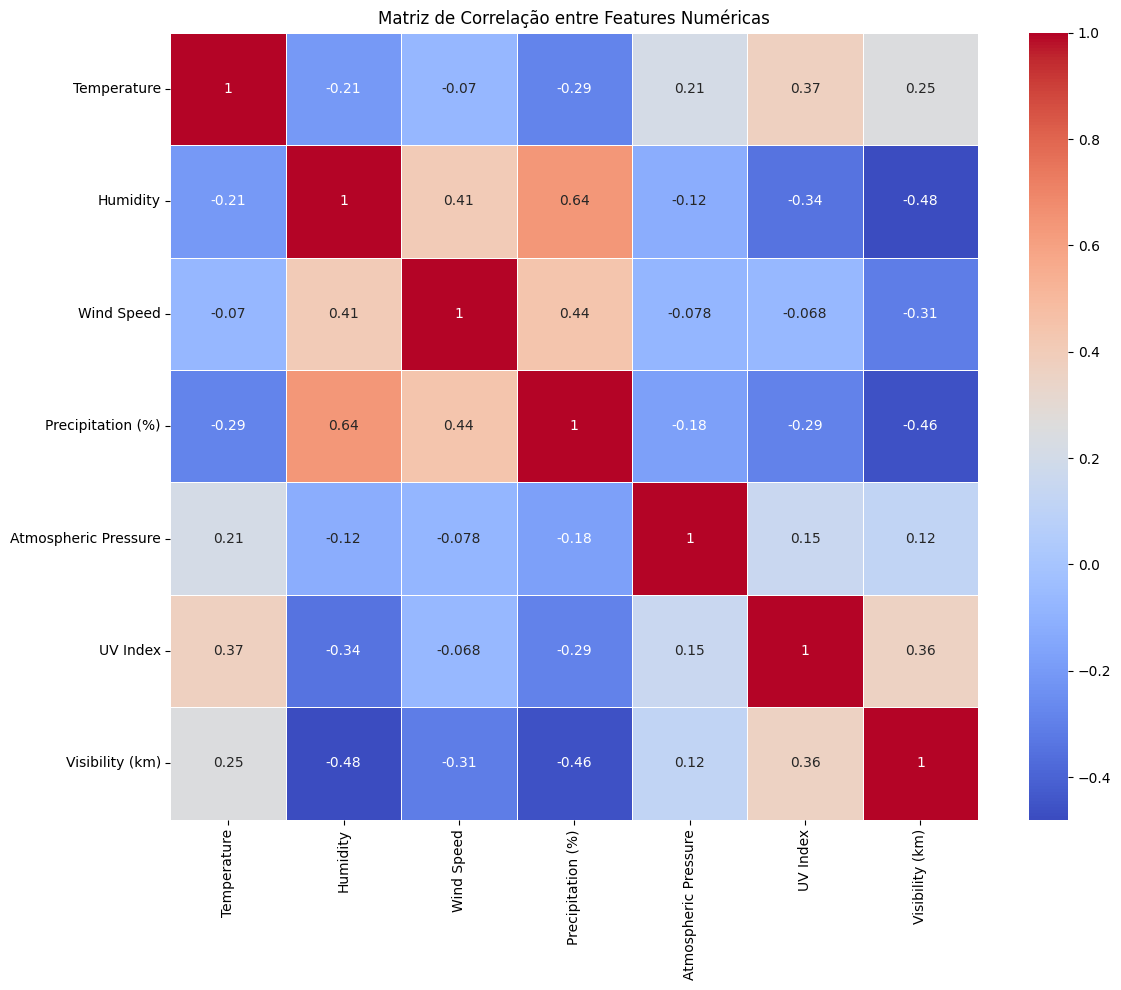

In [ ]:
# Matriz de correlação
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Features Numéricas')
plt.tight_layout()
plt.show()

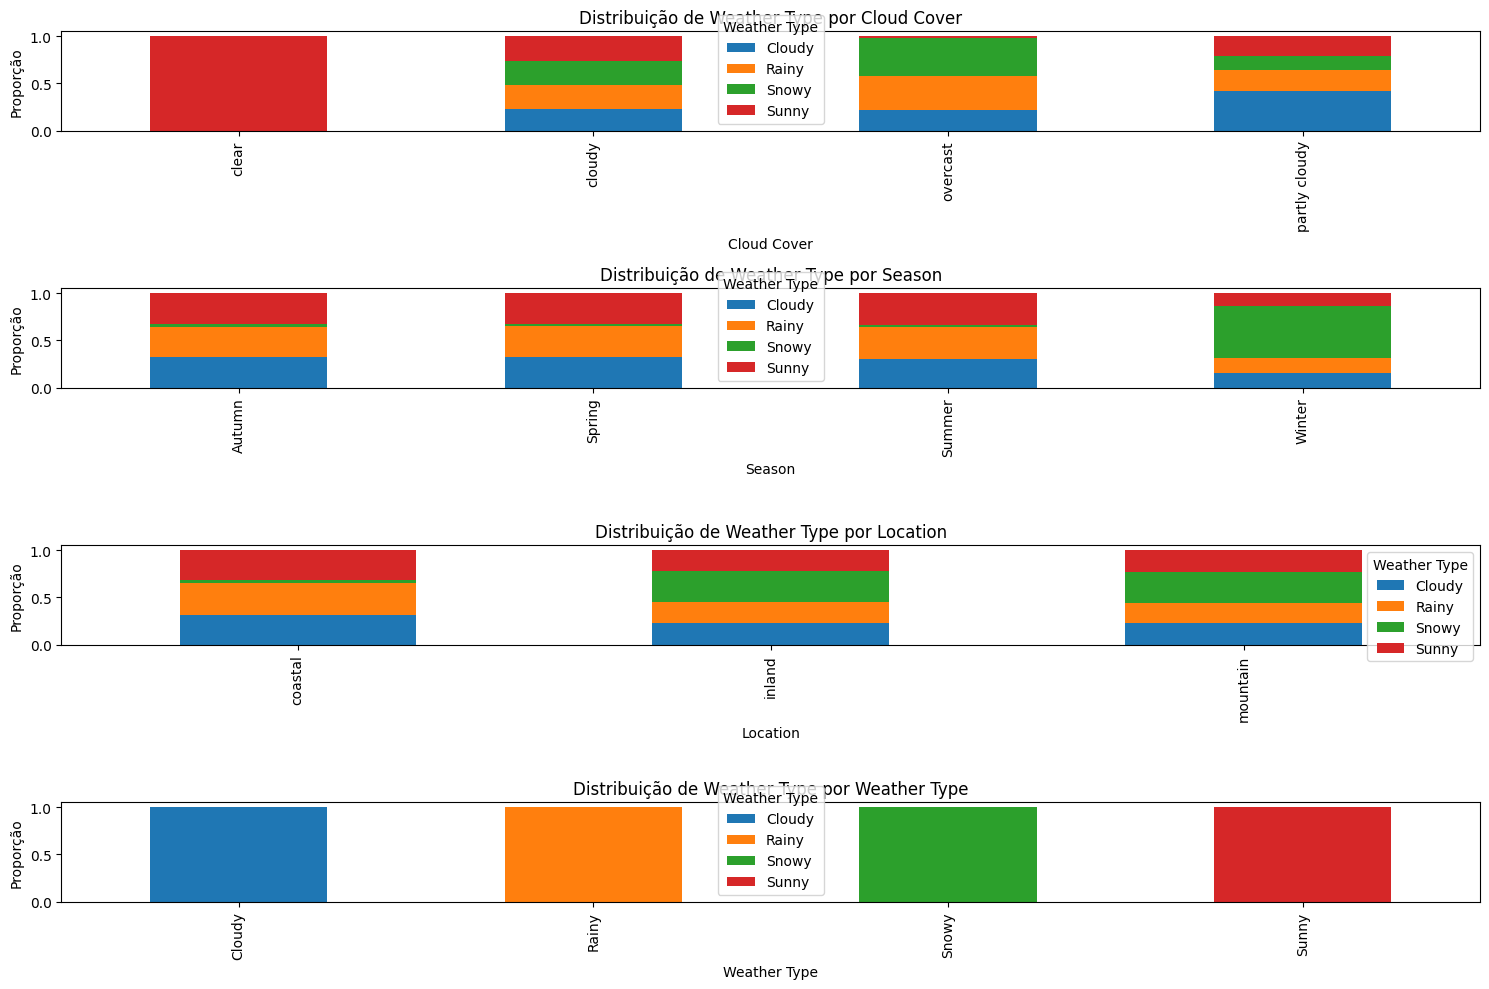

In [ ]:
# Análise das features categóricas
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features = [col for col in categorical_features if col != 'Weather_Type']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i+1)
    cross_tab = pd.crosstab(df[feature], df['Weather Type'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Distribuição de Weather Type por {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proporção')
    plt.legend(title='Weather Type')
plt.tight_layout()
plt.show()

In [ ]:
## 3. Detecção e Tratamento de Outliers

# Função para detectar outliers usando o método IQR (Interquartile Range)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound


Outliers em Temperature:
Limite inferior: -36.50
Limite superior: 71.50
Número de outliers: 92
Percentual de outliers: 0.70%

Outliers em Humidity:
Limite inferior: 16.50
Limite superior: 124.50
Número de outliers: 0
Percentual de outliers: 0.00%

Outliers em Wind Speed:
Limite inferior: -7.75
Limite superior: 26.25
Número de outliers: 404
Percentual de outliers: 3.06%

Outliers em Precipitation (%):
Limite inferior: -75.50
Limite superior: 176.50
Número de outliers: 0
Percentual de outliers: 0.00%

Outliers em Atmospheric Pressure:
Limite inferior: 961.84
Limite superior: 1049.73
Número de outliers: 927
Percentual de outliers: 7.02%

Outliers em UV Index:
Limite inferior: -8.00
Limite superior: 16.00
Número de outliers: 0
Percentual de outliers: 0.00%

Outliers em Visibility (km):
Limite inferior: -3.75
Limite superior: 14.25
Número de outliers: 383
Percentual de outliers: 2.90%


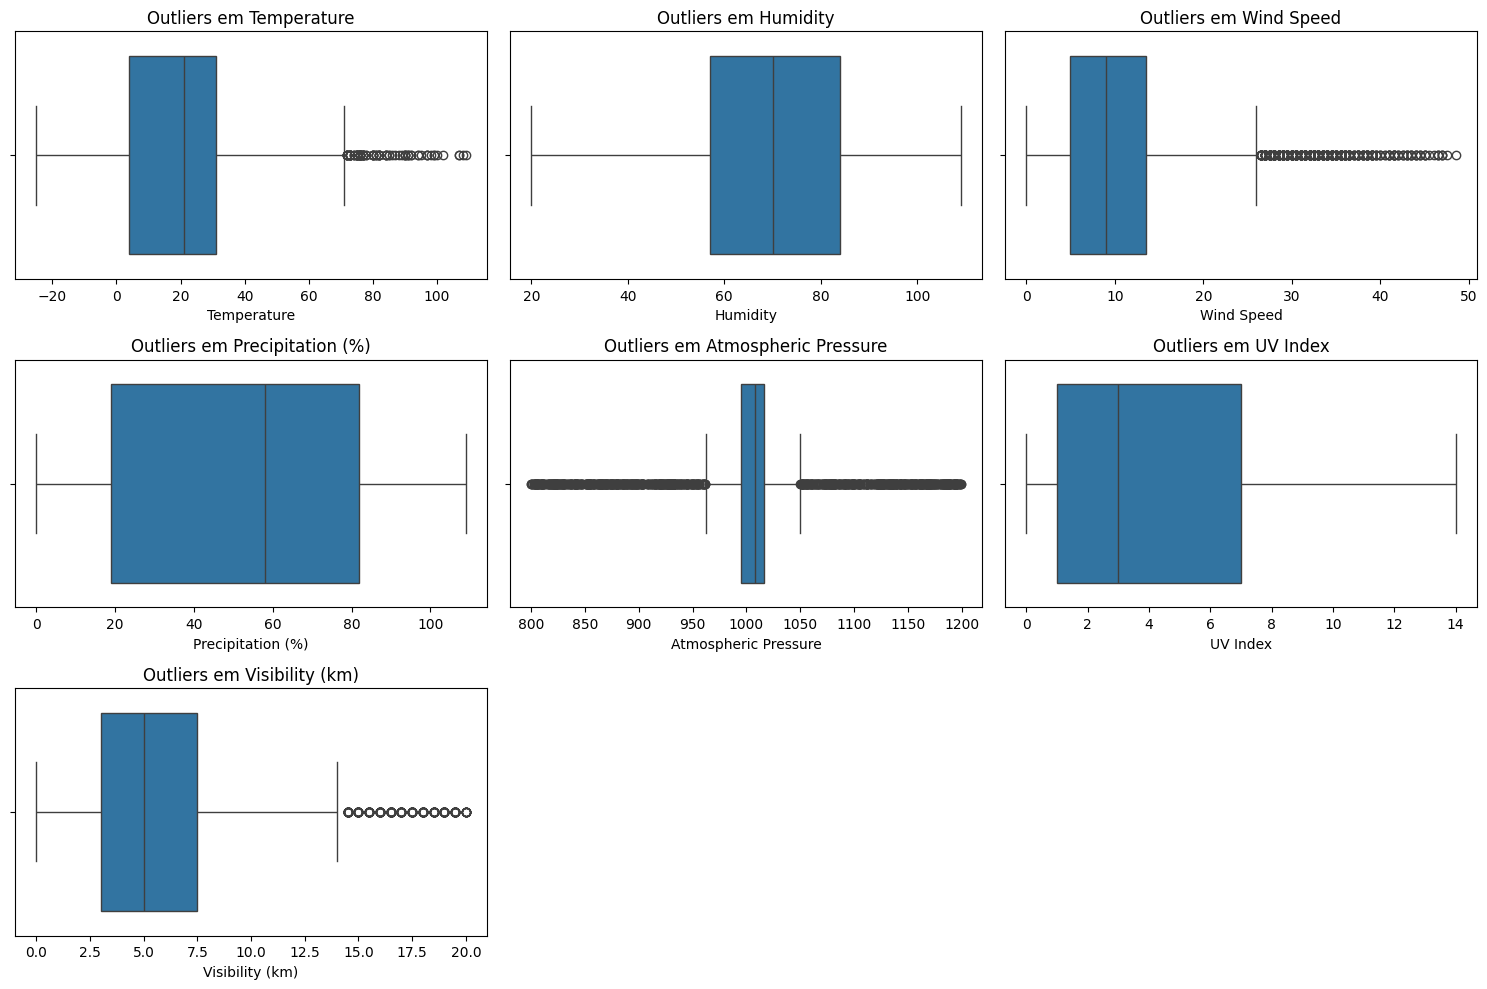

In [ ]:
# Detectando e visualizando outliers nas features numéricas
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    outliers, lower_bound, upper_bound = detect_outliers(df, feature)

    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Outliers em {feature}')
    plt.xlabel(feature)

    print(f"\nOutliers em {feature}:")
    print(f"Limite inferior: {lower_bound:.2f}")
    print(f"Limite superior: {upper_bound:.2f}")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Percentual de outliers: {(len(outliers) / len(df)) * 100:.2f}%")
plt.tight_layout()
plt.show()

In [ ]:
# Tratamento de outliers usando capping (limitando aos valores de limite)
df_clean = df.copy()
for feature in numeric_features:
    outliers, lower_bound, upper_bound = detect_outliers(df, feature)
    df_clean[feature] = np.where(df_clean[feature] < lower_bound, lower_bound, df_clean[feature])
    df_clean[feature] = np.where(df_clean[feature] > upper_bound, upper_bound, df_clean[feature])

print("\nComparação entre dados originais e após tratamento de outliers:")
for feature in numeric_features:
    print(f"\n{feature}:")
    print(f"Original - Min: {df[feature].min():.2f}, Max: {df[feature].max():.2f}")
    print(f"Após tratamento - Min: {df_clean[feature].min():.2f}, Max: {df_clean[feature].max():.2f}")


Comparação entre dados originais e após tratamento de outliers:

Temperature:
Original - Min: -25.00, Max: 109.00
Após tratamento - Min: -25.00, Max: 71.50

Humidity:
Original - Min: 20.00, Max: 109.00
Após tratamento - Min: 20.00, Max: 109.00

Wind Speed:
Original - Min: 0.00, Max: 48.50
Após tratamento - Min: 0.00, Max: 26.25

Precipitation (%):
Original - Min: 0.00, Max: 109.00
Após tratamento - Min: 0.00, Max: 109.00

Atmospheric Pressure:
Original - Min: 800.12, Max: 1199.21
Após tratamento - Min: 961.84, Max: 1049.73

UV Index:
Original - Min: 0.00, Max: 14.00
Após tratamento - Min: 0.00, Max: 14.00

Visibility (km):
Original - Min: 0.00, Max: 20.00
Após tratamento - Min: 0.00, Max: 14.25


In [ ]:
## 4. Pré-processamento dos Dados

# Separando features e target
X = df_clean.drop('Weather Type', axis=1)
y = df_clean['Weather Type']

In [ ]:
# Identificando tipos de colunas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print(f'\nFeatures numéricas: {list(numeric_features)}')
print(f'Features categóricas: {list(categorical_features)}')


Features numéricas: ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
Features categóricas: ['Cloud Cover', 'Season', 'Location']


In [ ]:
# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Criando os preprocessadores
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Criando o preprocessador completo
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Aplicando o pré-processamento
print("\nAplicando pré-processamento aos dados...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print("Pré-processamento concluído!")


Aplicando pré-processamento aos dados...
Pré-processamento concluído!


In [ ]:
# Label encoder para a variável alvo
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
print(f"Classes codificadas: {dict(zip(le.classes_, range(len(le.classes_))))}")

Classes codificadas: {'Cloudy': 0, 'Rainy': 1, 'Snowy': 2, 'Sunny': 3}


In [ ]:
## 5. Treinamento e Avaliação de Modelos

# Definindo os modelos a serem testados
models = {
    'Regressão Logística': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Rede Neural': MLPClassifier(max_iter=500, random_state=42)
}

In [ ]:
# Métricas para avaliar os modelos
metrics = {
    'Acurácia': accuracy_score,
    'Precisão': lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted'),
    'F1-Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')
}

In [ ]:
# Dicionário para armazenar os resultados
results = {name: {} for name in models.keys()}

In [ ]:
# Treinamento e avaliação dos modelos
print("\n===== Treinamento e Avaliação de Modelos =====")
for name, model in models.items():
    print(f"\nTreinando {name}...")
    model.fit(X_train_processed, y_train_encoded)

    y_pred_encoded = model.predict(X_test_processed)
    y_pred = le.inverse_transform(y_pred_encoded)

    print(f"Avaliação do modelo {name}:")
    for metric_name, metric_func in metrics.items():
        score = metric_func(y_test_encoded, y_pred_encoded)
        results[name][metric_name] = score
        print(f"{metric_name}: {score:.4f}")


===== Treinamento e Avaliação de Modelos =====

Treinando Regressão Logística...
Avaliação do modelo Regressão Logística:
Acurácia: 0.8720
Precisão: 0.8735
Recall: 0.8720
F1-Score: 0.8723

Treinando SVM...
Avaliação do modelo SVM:
Acurácia: 0.9087
Precisão: 0.9101
Recall: 0.9087
F1-Score: 0.9090

Treinando Random Forest...
Avaliação do modelo Random Forest:
Acurácia: 0.9136
Precisão: 0.9146
Recall: 0.9136
F1-Score: 0.9139

Treinando Rede Neural...
Avaliação do modelo Rede Neural:
Acurácia: 0.9098
Precisão: 0.9105
Recall: 0.9098
F1-Score: 0.9100


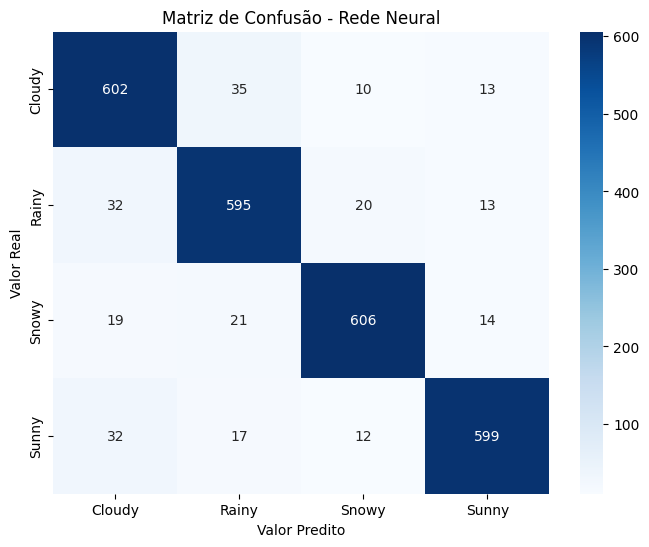

In [ ]:
# Matriz de confusão
cm = confusion_matrix(y_test_encoded, y_pred_encoded)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusão - {name}')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.show()

In [ ]:
# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

      Cloudy       0.88      0.91      0.90       660
       Rainy       0.89      0.90      0.90       660
       Snowy       0.94      0.92      0.93       660
       Sunny       0.94      0.91      0.92       660

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



In [ ]:
# Criando DataFrame com os resultados para comparação
results_df = pd.DataFrame(results).T
print("\nComparação dos Modelos:")
print(results_df)


Comparação dos Modelos:
                     Acurácia  Precisão    Recall  F1-Score
Regressão Logística  0.871970  0.873510  0.871970  0.872256
SVM                  0.908712  0.910102  0.908712  0.909047
Random Forest        0.913636  0.914554  0.913636  0.913856
Rede Neural          0.909848  0.910535  0.909848  0.910026


<Figure size 1400x800 with 0 Axes>

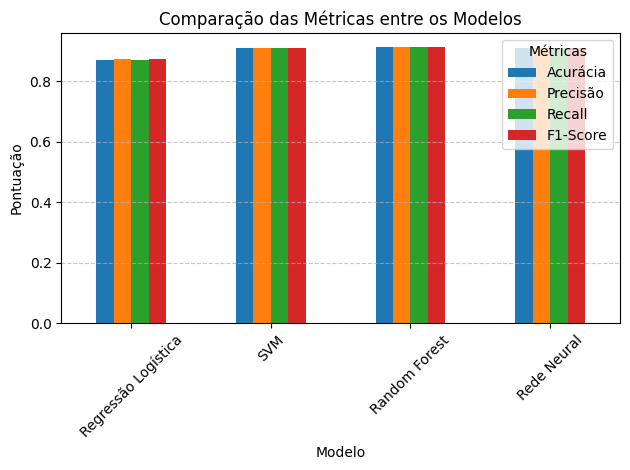

In [ ]:
# Visualização gráfica das métricas
plt.figure(figsize=(14, 8))
results_df.plot(kind='bar')
plt.title('Comparação das Métricas entre os Modelos')
plt.ylabel('Pontuação')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.legend(title='Métricas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
## 6. Otimização do Melhor Modelo

# Identificando o melhor modelo com base no F1-Score
best_model_name = results_df['F1-Score'].idxmax()
print(f"\nMelhor modelo baseado no F1-Score: {best_model_name}")


Melhor modelo baseado no F1-Score: Random Forest


In [ ]:
# Parâmetros para otimização do modelo escolhido
if best_model_name == 'Regressão Logística':
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs', 'newton-cg'],
        'max_iter': [1000, 2000]
    }
    best_model = LogisticRegression(random_state=42)
elif best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 0.01],
        'kernel': ['rbf', 'linear', 'poly']
    }
    best_model = SVC(random_state=42)
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    best_model = RandomForestClassifier(random_state=42)
elif best_model_name == 'Rede Neural':
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
    best_model = MLPClassifier(max_iter=1000, random_state=42)

In [ ]:
# Otimização de hiperparâmetros com GridSearchCV
print(f"\nOtimizando hiperparâmetros para {best_model_name}...")
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train_processed, y_train_encoded)


Otimizando hiperparâmetros para Random Forest...


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_weighted')

In [ ]:
# Melhores parâmetros e desempenho
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor pontuação F1 (validação cruzada): {grid_search.best_score_:.4f}")

Melhores parâmetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Melhor pontuação F1 (validação cruzada): 0.9180


In [ ]:
# Avaliando o melhor modelo otimizado no conjunto de teste
best_model_optimized = grid_search.best_estimator_
y_pred_optimized = best_model_optimized.predict(X_test_processed)
y_pred_optimized_labels = le.inverse_transform(y_pred_optimized)

print("\nDesempenho do modelo otimizado no conjunto de teste:")
for metric_name, metric_func in metrics.items():
    score = metric_func(y_test_encoded, y_pred_optimized)
    print(f"{metric_name}: {score:.4f}")


Desempenho do modelo otimizado no conjunto de teste:
Acurácia: 0.9114
Precisão: 0.9126
Recall: 0.9114
F1-Score: 0.9116


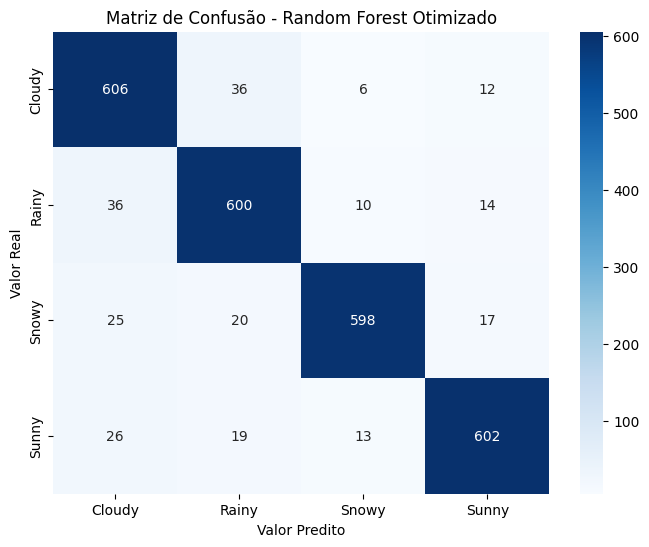

In [ ]:
# Matriz de confusão do modelo otimizado
cm_optimized = confusion_matrix(y_test_encoded, y_pred_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusão - {best_model_name} Otimizado')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.show()

In [ ]:
# Relatório de classificação do modelo otimizado
print("\nRelatório de Classificação do Modelo Otimizado:")
print(classification_report(y_test, y_pred_optimized_labels))


Relatório de Classificação do Modelo Otimizado:
              precision    recall  f1-score   support

      Cloudy       0.87      0.92      0.90       660
       Rainy       0.89      0.91      0.90       660
       Snowy       0.95      0.91      0.93       660
       Sunny       0.93      0.91      0.92       660

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640




Análise de Importância das Features:


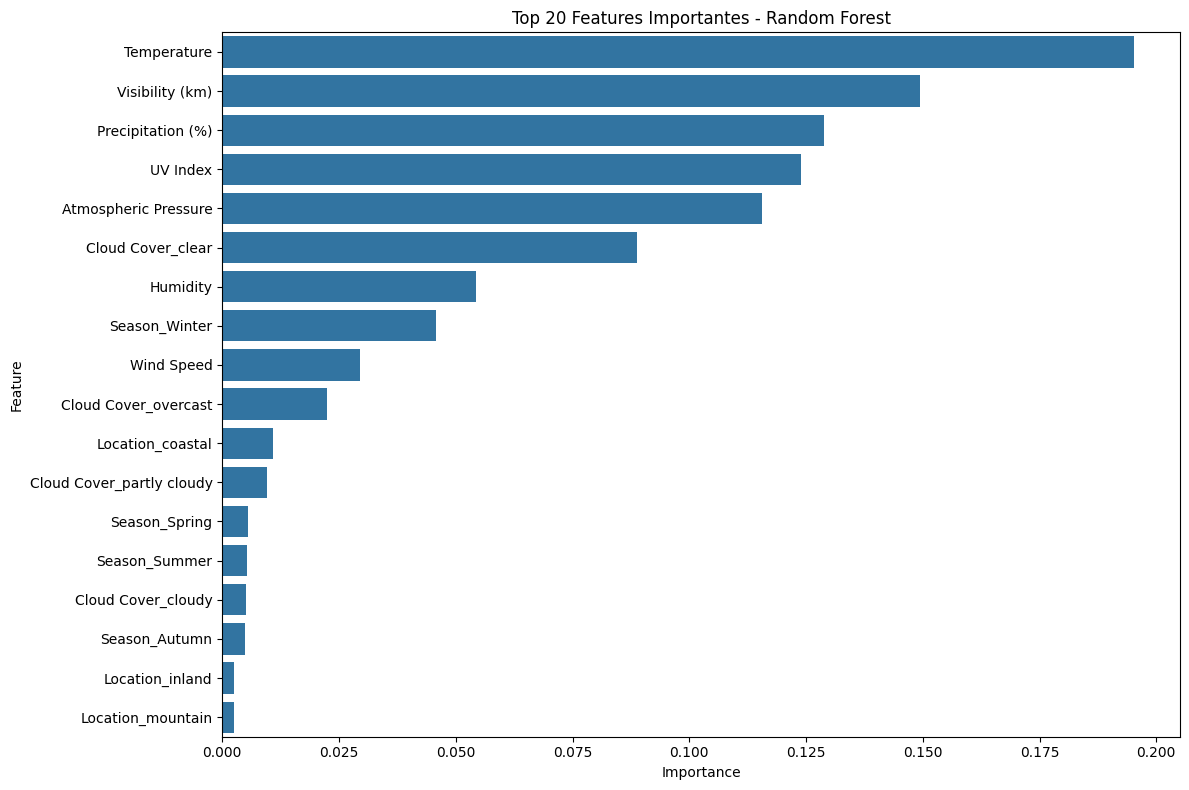

In [ ]:
if best_model_name in ['Random Forest', 'Regressão Logística']:
    print("\nAnálise de Importância das Features:")

    if best_model_name == 'Random Forest':
        # Importância das features para Random Forest
        importances = best_model_optimized.feature_importances_

    elif best_model_name == 'Regressão Logística':
        # Coeficientes para Regressão Logística (absolutos para multi-classe)
        importances = np.mean(np.abs(best_model_optimized.coef_), axis=0)

    # Obtendo os nomes das features após transformação
    feature_names = []

    # Para features numéricas
    if hasattr(preprocessor, 'transformers_'):
        for name, transformer, features in preprocessor.transformers_:
            if name == 'num':
                feature_names.extend(features)
            elif name == 'cat' and hasattr(preprocessor.named_transformers_[name], 'named_steps'):
                # Obtendo todas as categorias de uma vez
                try:
                    cat_encoder = preprocessor.named_transformers_[name].named_steps['onehot']
                    cat_feature_names = cat_encoder.get_feature_names_out(features)
                    feature_names.extend(cat_feature_names)
                except:
                    # Fallback caso ocorra erro
                    for i in range(len(importances) - len(feature_names)):
                        feature_names.append(f'Cat_Feature_{i}')

    # Se o número de features transformadas não corresponder, use índices
    if len(feature_names) != len(importances):
        feature_names = [f'Feature {i}' for i in range(len(importances))]

    # Criando DataFrame de importância
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Ordenando por importância
    importance_df = importance_df.sort_values('Importance', ascending=False).head(20)

    # Plotando as importâncias
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Top 20 Features Importantes - {best_model_name}')
    plt.tight_layout()
    plt.show()

In [ ]:
## 8. Salvando o Modelo Final e os Pré-processadores

# Criando um pipeline completo com preprocessamento e modelo
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model_optimized)
])

In [ ]:
# Salvando o pipeline completo
print("\nSalvando o modelo final e os pré-processadores...")
joblib.dump(final_pipeline, 'weather_type_prediction_model.joblib')

# Salvando o LabelEncoder para a variável alvo
joblib.dump(le, 'weather_type_label_encoder.joblib')

print("Modelo e preprocessadores salvos com sucesso!")


Salvando o modelo final e os pré-processadores...
Modelo e preprocessadores salvos com sucesso!


In [ ]:
## 9. Conclusão e Recomendações

print("\n===== Conclusão e Recomendações =====")
print(f"1. O melhor modelo para predição de tipos de clima é: {best_model_name}")
print(f"2. Acurácia do modelo otimizado: {accuracy_score(y_test_encoded, y_pred_optimized):.4f}")
print(f"3. F1-Score do modelo otimizado: {f1_score(y_test_encoded, y_pred_optimized, average='weighted'):.4f}")

print("\nObservações importantes:")
print("- O dataset foi pré-processado com tratamento de outliers e normalização.")
print("- Features categóricas foram transformadas usando one-hot encoding.")
print("- A otimização de hiperparâmetros melhorou o desempenho do modelo.")

print("\nPróximos passos:")
print("1. Implementar o modelo em uma API para predições em tempo real.")
print("2. Desenvolver um dashboard para visualização dos resultados.")
print("3. Implementar monitoramento do modelo em produção.")

# Exemplo de uso do modelo salvo
print("\nExemplo de como usar o modelo salvo:")
print("```python")
print("import joblib")
print("import pandas as pd")
print("")
print("# Carregar o modelo e o label encoder")
print("model = joblib.load('weather_type_prediction_model.joblib')")
print("le = joblib.load('weather_type_label_encoder.joblib')")
print("")
print("# Dados de exemplo para previsão")
print("example_data = pd.DataFrame({")
print("    'Temperature': [25.5],")
print("    'Humidity': [78.2],")
print("    'Wind_Speed': [15.0],")
print("    'Precipitation': [8.5],")
print("    'Cloud_Cover': ['Partly Cloudy'],")
print("    'Atmospheric_Pressure': [1013.2],")
print("    'UV_Index': [5.8],")
print("    'Season': ['Summer'],")
print("    'Visibility': [12.5],")
print("    'Location': ['Coastal']")
print("})")
print("")
print("# Fazer a predição")
print("prediction_encoded = model.predict(example_data)")
print("prediction = le.inverse_transform(prediction_encoded)")
print("print(f'Predicted Weather Type: {prediction[0]}')")
print("```")


===== Conclusão e Recomendações =====
1. O melhor modelo para predição de tipos de clima é: Random Forest
2. Acurácia do modelo otimizado: 0.9114
3. F1-Score do modelo otimizado: 0.9116

Observações importantes:
- O dataset foi pré-processado com tratamento de outliers e normalização.
- Features categóricas foram transformadas usando one-hot encoding.
- A otimização de hiperparâmetros melhorou o desempenho do modelo.

Próximos passos:
1. Implementar o modelo em uma API para predições em tempo real.
2. Desenvolver um dashboard para visualização dos resultados.
3. Implementar monitoramento do modelo em produção.

Exemplo de como usar o modelo salvo:
```python
import joblib
import pandas as pd

# Carregar o modelo e o label encoder
model = joblib.load('weather_type_prediction_model.joblib')
le = joblib.load('weather_type_label_encoder.joblib')

# Dados de exemplo para previsão
example_data = pd.DataFrame({
    'Temperature': [25.5],
    'Humidity': [78.2],
    'Wind_Speed': [15.0],
    '